**Importing Libraries**

In [11]:
import numpy as np #For arrays,linear algebra/matrices
import pandas as pd #For datasets,cleaning/exploring
import matplotlib #For creating static interactive visulization
import matplotlib.pyplot as plt
import seaborn as sns #For data visulization and ML task
import warnings #For displaying warning
warnings.filterwarnings('ignore') #Ignore - never dislplay the warnings which match
import geopandas as gpd
import random
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected = True)
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

**Datasets**

In [3]:
df = pd.read_csv('/content/Election.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALS_VOTERS,POSTAL_VOTERS\n,TOTAL_VOTERS,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [4]:
df.rename(columns={'POSTAL_VOTERS\n': 'POSTAL_VOTERS'}, inplace=True)


In [5]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALS_VOTERS,POSTAL_VOTERS,TOTAL_VOTERS,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL                                  2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [7]:
df.shape

(2263, 19)

In [8]:
df['AGE'].describe()

count    2018.000000
mean       52.273538
std        11.869373
min        25.000000
25%        43.250000
50%        52.000000
75%        61.000000
max        86.000000
Name: AGE, dtype: float64

In [9]:
df.corr()

,WINNER,AGE,GENERALS_VOTERS,POSTAL_VOTERS,TOTAL_VOTERS,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n,TOTAL_ELECTORS
WINNER,1.000000,0.110294,0.725678,0.520286,0.726125,0.738976,0.757303,0.038107
AGE,0.110294,1.000000,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083
GENERALS_VOTERS,0.725678,0.208567,1.000000,0.616742,0.999988,0.962219,0.962905,0.211092
POSTAL_VOTERS,0.520286,0.129360,0.616742,1.000000,0.620614,0.630882,0.634896,0.038453
TOTAL_VOTERS,0.726125,0.208600,0.999988,0.620614,1.000000,0.962441,0.963150,0.210515
OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,0.738976,0.207304,0.962219,0.630882,0.962441,1.000000,0.977416,0.009227
OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n,0.757303,0.223700,0.962905,0.634896,0.963150,0.977416,1.000000,0.072228
TOTAL_ELECTORS,0.038107,0.021083,0.211092,0.038453,0.210515,0.009227,0.072228,1.000000


In [12]:
x=df.drop('WINNER',axis=1)
y=df['WINNER']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1810, 18) (1810,)
(453, 18) (453,)


**Data Cleaning**

In [13]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL                                     245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERALS_VOTERS                                0
POSTAL_VOTERS                                  0
TOTAL_VOTERS                                   0
OVER_TOTAL_ELECTORS_IN_CONSTITUENCY            0
OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n      0
TOTAL_ELECTORS                                 0
dtype: int64

In [14]:
df_non_nota = df.dropna()
df_non_nota.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALS_VOTERS,POSTAL_VOTERS,TOTAL_VOTERS,OVER_TOTAL_ELECTORS_IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


In [15]:
df_non_nota.isnull().sum()

STATE                                        0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                       0
GENDER                                       0
CRIMINAL                                     0
AGE                                          0
CATEGORY                                     0
EDUCATION                                    0
ASSETS                                       0
LIABILITIES                                  0
GENERALS_VOTERS                              0
POSTAL_VOTERS                                0
TOTAL_VOTERS                                 0
OVER_TOTAL_ELECTORS_IN_CONSTITUENCY          0
OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n    0
TOTAL_ELECTORS                               0
dtype: int64

In [17]:
df_non_nota.drop(['SYMBOL','ASSETS','LIABILITIES','GENERALS_VOTERS','POSTAL_VOTERS','OVER_TOTAL_ELECTORS_IN_CONSTITUENCY','TOTAL_ELECTORS'],axis=1,inplace=True)
df_non_nota.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL,AGE,CATEGORY,EDUCATION,TOTAL_VOTERS,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52.0,ST,12th Pass,377374,35.468248
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54.0,ST,Post Graduate,318814,29.964370
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52.0,ST,12th Pass,314238,29.534285
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,MALE,5,58.0,SC,Doctorate,646875,56.464615
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,MALE,0,47.0,SC,Post Graduate,435329,37.999125


In [18]:
df_non_nota.EDUCATION.value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

**Data transformation**

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
print("Original Dataset:")
print(df.head())
df.dropna(inplace=True)
le = LabelEncoder()
df['PARTY'] = le.fit_transform(df['PARTY'])
scaler = StandardScaler()
numerical_cols = ['TOTAL_VOTERS', 'GENERALS_VOTERS']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
dataset = pd.get_dummies(df, columns=['STATE', 'NAME'])
print("\nTransformed Dataset:")
print(df.head())

Original Dataset:
           STATE CONSTITUENCY                   NAME  WINNER  PARTY    SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1     26     Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0    119       Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0     46      Hand   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1     26     Lotus   
5  Uttar Pradesh         AGRA       Manoj Kumar Soni       0     35  Elephant   

  GENDER CRIMINAL   AGE CATEGORY      EDUCATION  \
0   MALE       52  52.0       ST      12th Pass   
1   MALE        0  54.0       ST  Post Graduate   
2   MALE        3  52.0       ST      12th Pass   
4   MALE        5  58.0       SC      Doctorate   
5   MALE        0  47.0       SC  Post Graduate   

                          ASSETS                  LIABILITIES  \
0      Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+   
1    Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 La

In [27]:
!pip install plotly

**Visualization**

In [31]:
top_20parties = pd.Series(df_non_nota['PARTY'].value_counts().head(21))
top_20parties = top_20parties.index.drop(['IND'])
top_20parties

Index(['BJP', 'INC', 'BSP', 'CPI(M)', 'VBA', 'AITC', 'SP', 'NTK', 'MNM', 'SHS',
       'TDP', 'AAP', 'YSRCP', 'DMK', 'RJD', 'NCP', 'AIADMK', 'BJD', 'JnP',
       'JD(U)'],
      dtype='object')

In [33]:
candidate_df=df.drop(['SYMBOL', 'GENERALS_VOTERS', 'POSTAL_VOTERS','OVER_TOTAL_ELECTORS_IN_CONSTITUENCY', 'OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n'], axis=1)
candidate_df.rename(columns = {"CRIMINAL": "CRIMINAL", "TOTAL_VOTES": "TOTAL_VOTES"}, inplace = True)
candidate_df.sort_values(["STATE", "CONSTITUENCY"], inplace = True)

In [34]:
winner_df = candidate_df[candidate_df['WINNER']== 1].sort_values(['STATE','CONSTITUENCY']).reset_index()
winner_df.drop(['index','WINNER'],axis = 1,inplace = True)
winner_df.head()

,STATE,CONSTITUENCY,NAME,PARTY,GENDER,CRIMINAL,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_VOTERS,TOTAL_ELECTORS
0,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,46,MALE,0,52.0,GENERAL,Graduate Professional,"Rs 13,22,33,012\n ~ 13 Crore+","Rs 8,04,50,870\n ~ 8 Crore+",-0.770915,318471
1,Andhra Pradesh,AMALAPURAM,CHINTA ANURADHA,130,FEMALE,0,46.0,SC,Graduate,"Rs 8,59,93,362\n ~ 8 Crore+","Rs 24,31,407\n ~ 24 Lacs+",0.757904,1459556
2,Andhra Pradesh,ANAKAPALLI,Dr.Beesetti Venkata Satyavathi,130,FEMALE,0,52.0,GENERAL,Graduate Professional,"Rs 9,15,26,244\n ~ 9 Crore+","Rs 1,11,39,279\n ~ 1 Crore+",1.150305,1521363
3,Andhra Pradesh,ANANTAPUR,TALARI RANGAIAH,130,MALE,2,48.0,GENERAL,Doctorate,"Rs 1,17,73,091\n ~ 1 Crore+","Rs 11,35,547\n ~ 11 Lacs+",1.576809,1664160
4,Andhra Pradesh,ARUKU,GODDETI. MADHAVI,130,FEMALE,0,26.0,ST,Graduate Professional,"Rs 1,41,179\n ~ 1 Lacs+",Rs 0\n ~,1.056240,1451418


In [35]:
all_party_seat = winner_df.PARTY.value_counts().sort_values(ascending = False)
all_party_seat

26     300
46      52
42      23
130     22
13      22
108     18
54      16
35      11
24      11
119      9
70       6
111      5
38       5
78       5
47       4
58       3
116      3
50       3
10       2
4        2
103      2
81       1
73       1
79       1
14       1
68       1
1        1
96       1
110      1
99       1
123      1
8        1
53       1
62       1
16       1
82       1
Name: PARTY, dtype: int64

In [129]:
candidate_personal_df = candidate_df[candidate_df.NAME != 'NOTA']
candidate_personal_df.head(3)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_VOTERS,TOTAL_ELECTORS
105,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,KULDEEP RAI SHARMA,1,46,MALE,0,52.0,GENERAL,Graduate Professional,"Rs 13,22,33,012\n ~ 13 Crore+","Rs 8,04,50,870\n ~ 8 Crore+",-0.770915,318471
106,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,VISHAL JOLLY,0,26,MALE,1,46.0,GENERAL,Graduate Professional,"Rs 8,51,40,573\n ~ 8 Crore+","Rs 46,33,914\n ~ 46 Lacs+",-0.776422,318471
107,Andaman & Nicobar Islands,ANDAMAN & NICOBAR ISLANDS,PARITOSH KUMAR HALDAR,0,47,MALE,0,61.0,GENERAL,Post Graduate,"Rs 1,99,16,000\n ~ 1 Crore+","Rs 13,11,000\n ~ 13 Lacs+",-1.123003,318471


In [38]:
print(df.shape) #original shape
print(candidate_df.shape) #after removing some columns
print(candidate_personal_df.shape)

(2018, 19)
(2018, 14)
(2018, 14)


In [39]:
print(df.shape) #original shape
print(candidate_df.shape) #after removing some columns
print(candidate_personal_df.shape) #after removing some rows(NOTA candidate)
print(winner_df.shape)

(2018, 19)
(2018, 14)
(2018, 14)
(539, 13)


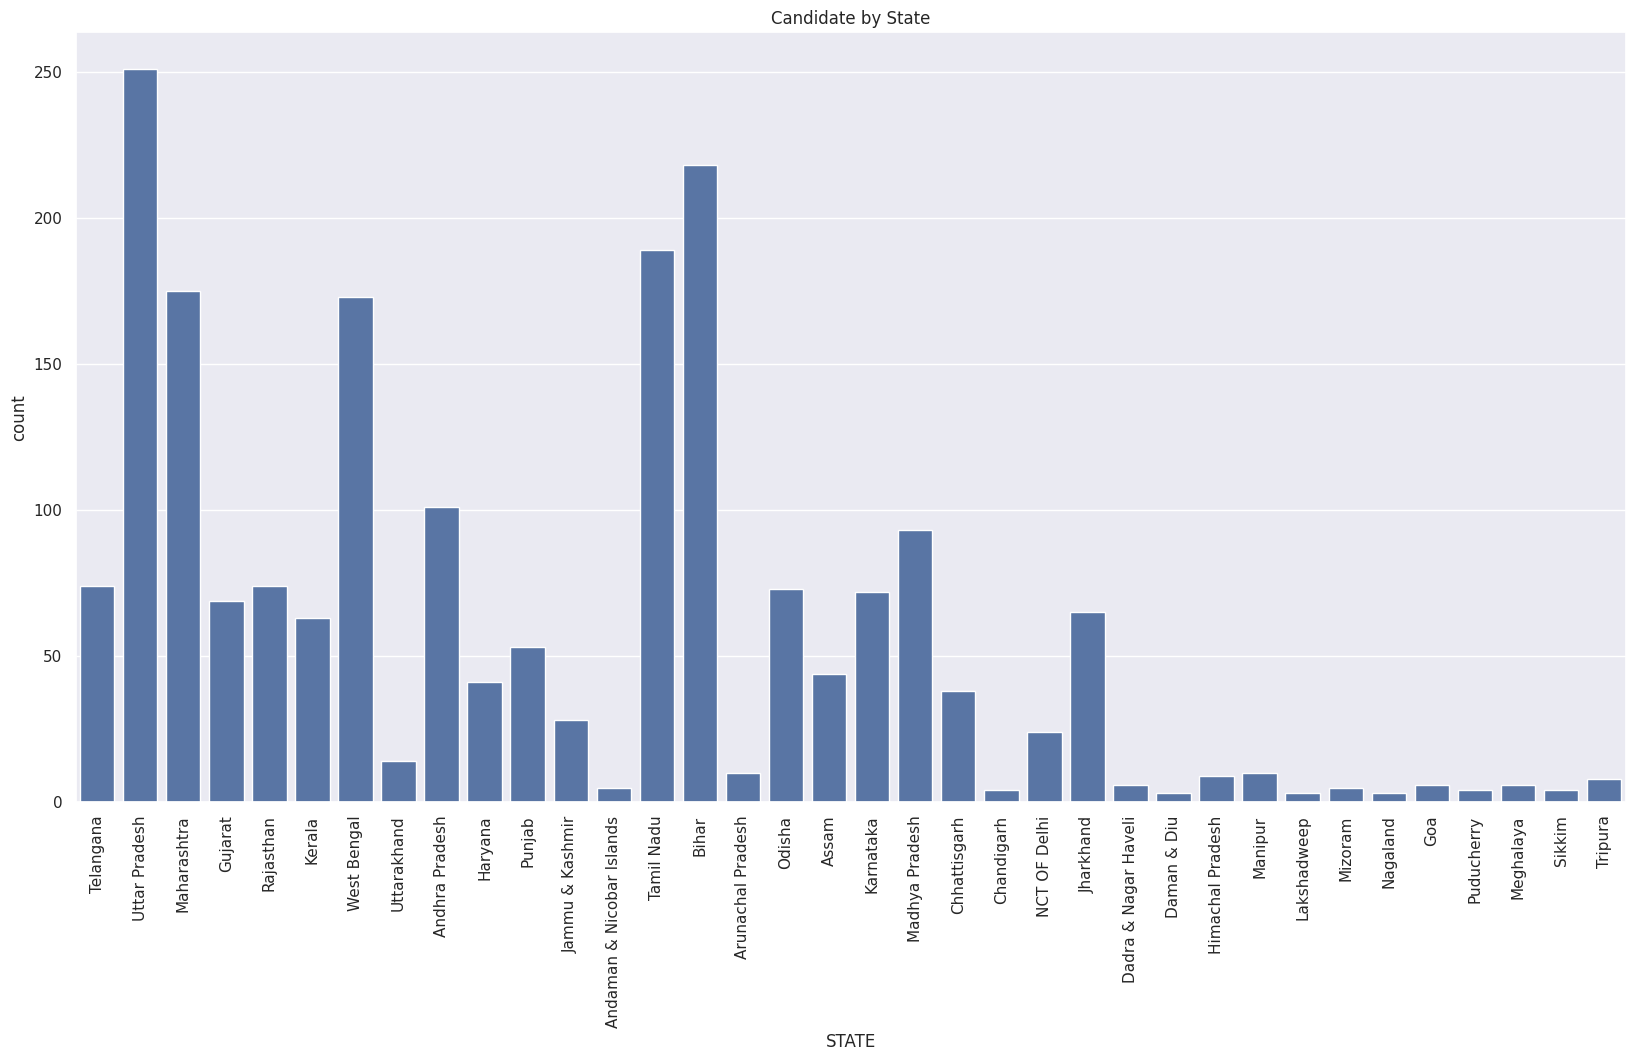

In [134]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x=df_non_nota['STATE'], data=df)
plt.title('Candidate by State')
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

This code generates a bar chart that shows the count of candidates in each state. The chart is made more visually appealing by adjusting the figure size and setting a dark grid style. The x-axis labels (states) are rotated for better readability. This plot provides a quick overview of the distribution of candidates across different states in a clear and concise manner.

<Axes: >

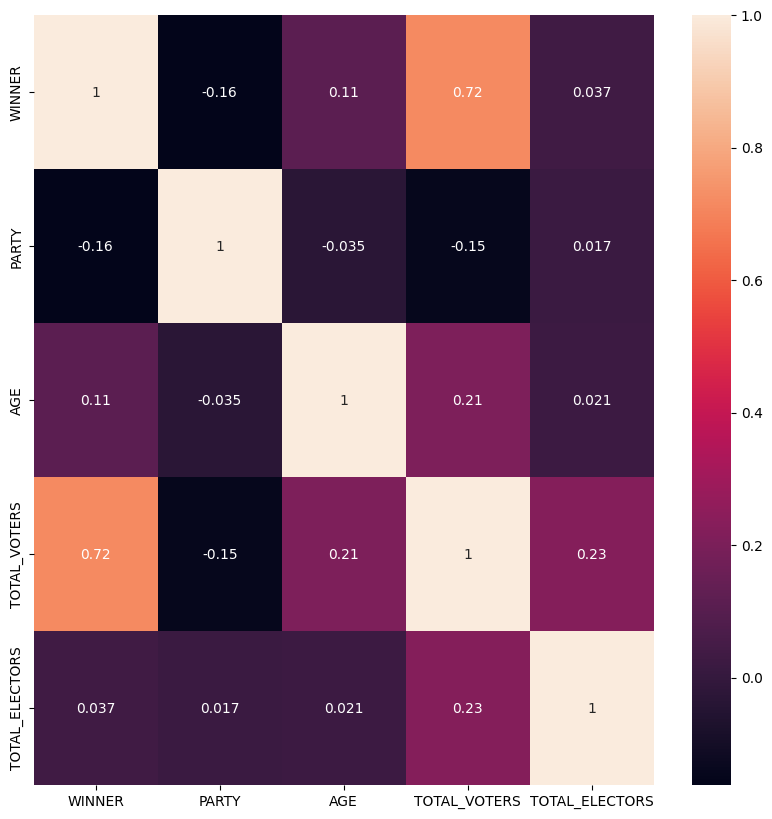

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(candidate_personal_df.corr(),annot = True)

"This code generates a heatmap to visually represent the correlation matrix of the 'candidate_personal_df' dataset. The figure size is set to 10x10 inches to ensure clarity and readability. The heatmap provides insights into the linear relationships between different variables in the dataset. The annotated values within each cell indicate the strength and direction of the correlation, aiding in the identification of potential patterns or dependencies among the personal attributes of the election candidates in the context of the 2019 General Election."

<Axes: xlabel='count', ylabel='EDUCATION'>

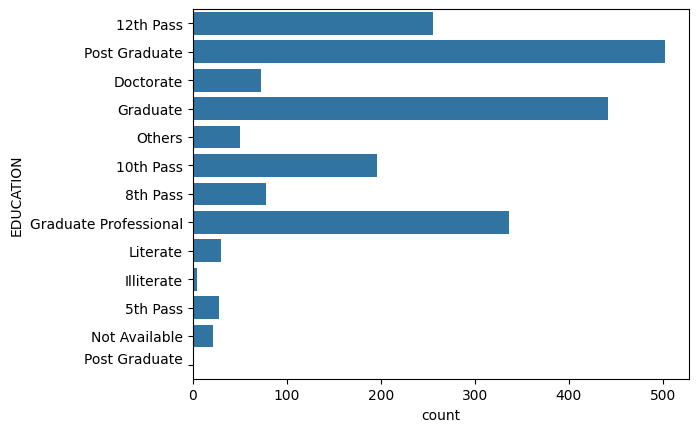

In [30]:
sns.countplot(df_non_nota['EDUCATION'])

"This count plot visualizes the distribution of educational levels ('EDUCATION') among the observations in the 'df_non_nota' DataFrame. Each bar on the plot represents a unique education category, and the height of the bar corresponds to the count of observations belonging to that category. This visualization provides a quick and effective way to understand the educational composition within the dataset, offering insights into the prevalence of different education levels among the non-NOTA (None of the Above) instances. Analyzing this distribution can be valuable for understanding the educational diversity and patterns present in the dataset."

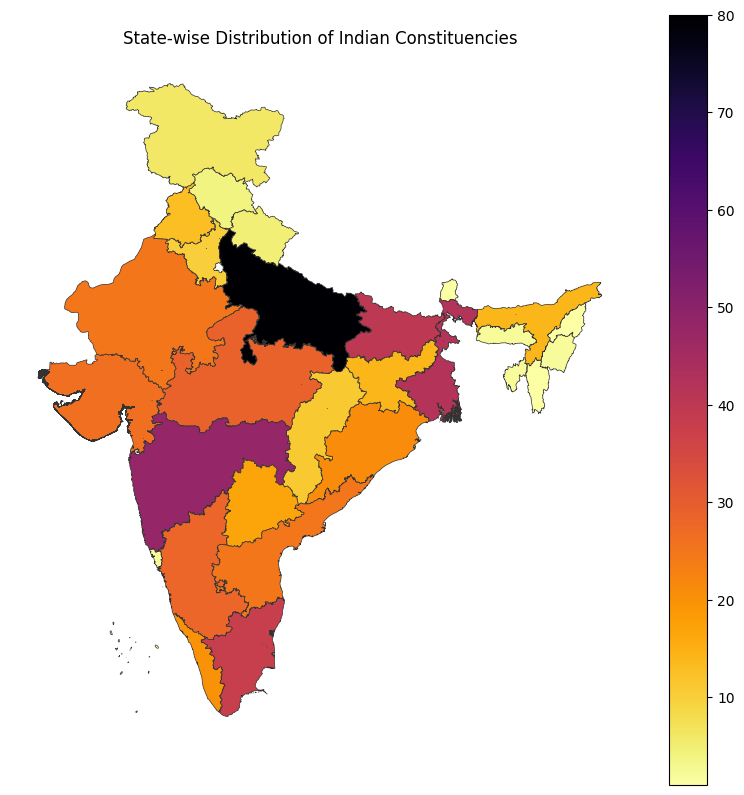

In [41]:
st = candidate_personal_df.groupby('STATE').apply(lambda x : x['CONSTITUENCY'].nunique()).reset_index(name = 'CONSTITUENCY') #grouping state
shp_gdf = gpd.read_file('/content/Indian_States.shp')
merged = shp_gdf.set_index("st_nm").join(st.set_index('STATE'))
fig, ax = plt.subplots(1,figsize = (10,10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies')
fig = merged.plot(column = "CONSTITUENCY",cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True )
st.sort_values(by='CONSTITUENCY',ascending=False,inplace=True)
fig2 = px.bar(st,x = 'STATE', y = 'CONSTITUENCY',color ='CONSTITUENCY',labels= {'pop':'Costituencies of India'})
fig2.update_layout(title_text ='Statewise distribution of constituencis all over India',template ='plotly_dark')
fig2.show()

"This code combines geospatial and bar chart visualizations to depict the state-wise distribution of constituencies in India. The GeoPandas library is used to merge constituency count data with the geographical shapefile of Indian states. The resulting geospatial plot showcases the distribution of constituencies across states using a color gradient. Additionally, a Plotly bar chart is generated to provide an interactive representation of the same information, allowing for a more detailed exploration of the constituency counts in each state. This comprehensive visualization aids in understanding the variations in the number of constituencies across different states in India."

<Axes: xlabel='CATEGORY', ylabel='Count'>

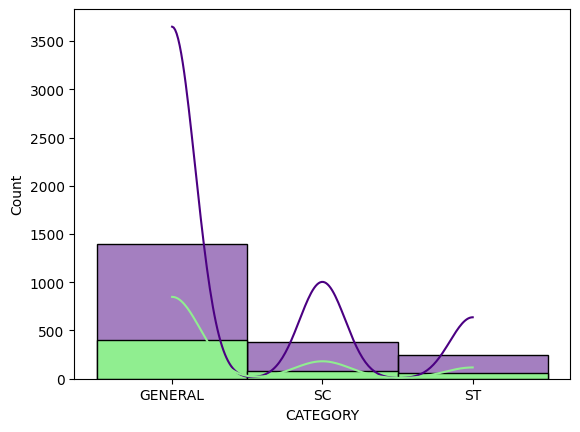

In [42]:
%matplotlib inline
import plotly.express as px
sns.histplot(data = candidate_personal_df, x= 'CATEGORY',bins = np.arange(0,50,10),color = 'indigo',alpha = 0.5,kde = True)
sns.histplot(data = winner_df, x= 'CATEGORY',bins = np.arange(0,50,10),color ='lightgreen',alpha = 1,kde = True)

"This code generates overlaid histograms comparing the distribution of the 'CATEGORY' variable in two datasets, 'candidate_personal_df' and 'winner_df'. The indigo-colored histogram represents the distribution in the 'candidate_personal_df' dataset, while the light green-colored histogram corresponds to the 'winner_df' dataset. The histograms are created using Seaborn, with transparency (alpha) applied for visual clarity. Kernel density estimation (KDE) curves are included to provide a smooth representation of the probability density function for each dataset. This visualization allows for a quick comparison of the 'CATEGORY' variable between the overall candidates and the winners, providing insights into potential differences or patterns in the distribution of categories in the context of the General Election dataset."

Text(0.77, 0.5, 'mean    54.44\nmin     26.00\nmax     86.00')

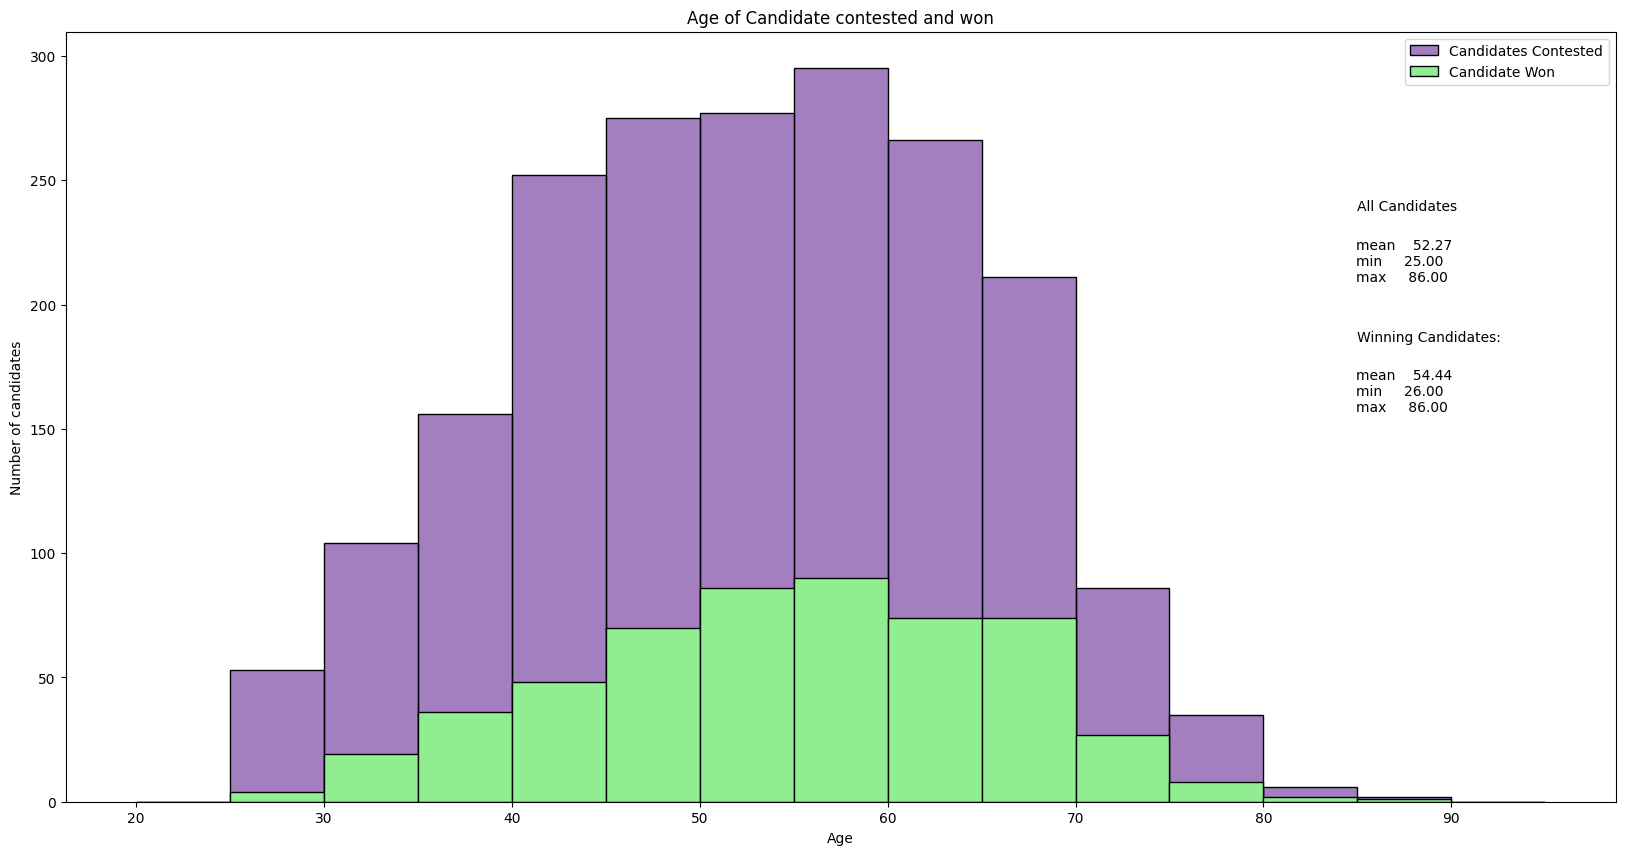

In [43]:
plt.figure(figsize = (20,10)) #for figsize
plt.title("Age of Candidate contested and won") #for title
plt.xlabel('Age') #for x axis label
plt.ylabel("Number of candidates") #for y axis label

sns.histplot(data = candidate_personal_df, x= 'AGE',bins = np.arange(20,100,5),color = 'indigo',alpha = 0.5) #histogram
sns.histplot(data = winner_df, x= 'AGE',bins = np.arange(20,100,5),color ='lightgreen',alpha = 1) #histogram

plt.legend(['Candidates Contested','Candidate Won']) #for legend

plt.text(85,238,"All Candidates") #marking
plt.figtext(0.77,0.63, round(candidate_personal_df.describe().AGE[['mean','min','max']],2).to_string())

plt.text(85,185,"Winning Candidates:")
plt.figtext(0.77,0.5, round(winner_df.describe().AGE[['mean','min','max']],2).to_string())

"This code generates an overlaid histogram comparing the age distribution of candidates who contested and those who won in the General Election. The indigo-colored histogram represents all candidates who contested, while the light green-colored histogram represents winning candidates. The plot provides insights into the age demographics of the candidate pool, with additional statistical information such as mean, minimum, and maximum ages displayed. The visualization offers a comparative perspective on the age distribution between all candidates and the subset of candidates who emerged victorious in the election."

**SPLITTING DATA INTO TRAIN AND TEST SET**

In [45]:
X=df.drop(['WINNER','NAME','SYMBOL'],axis=1)
y=df['WINNER']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33, random_state=42)

**Train and Test the Model**

In [95]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(32,activation = 'relu', input_shape= (18,)))
model1.add(Dense(32,activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(X_train, Y_train,
                  batch_size=32, epochs=200, validation_data=(X_val, Y_val))

Epoch 1/200
46/46 [==============================] - 2s 19ms/step - loss: 152783814656000.0000 - accuracy: 0.7266 - val_loss: 0.6721 - val_accuracy: 0.7284
Epoch 2/200
46/46 [==============================] - 1s 13ms/step - loss: 0.6623 - accuracy: 0.7348 - val_loss: 0.6545 - val_accuracy: 0.7284
Epoch 3/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.7348 - val_loss: 0.6404 - val_accuracy: 0.7284
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.7348 - val_loss: 0.6294 - val_accuracy: 0.7284
Epoch 5/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.7348 - val_loss: 0.6206 - val_accuracy: 0.7284
Epoch 6/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.7348 - val_loss: 0.6134 - val_accuracy: 0.7284
Epoch 7/200
46/46 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.7348 - val_loss: 0.6078 - val_accuracy: 0.72

In [96]:
score = model1.evaluate(X_test,Y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

13/13 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7277
Loss:  0.5856377482414246
Accuracy:  0.7277227640151978


**Correlation Matrix**

<Axes: >

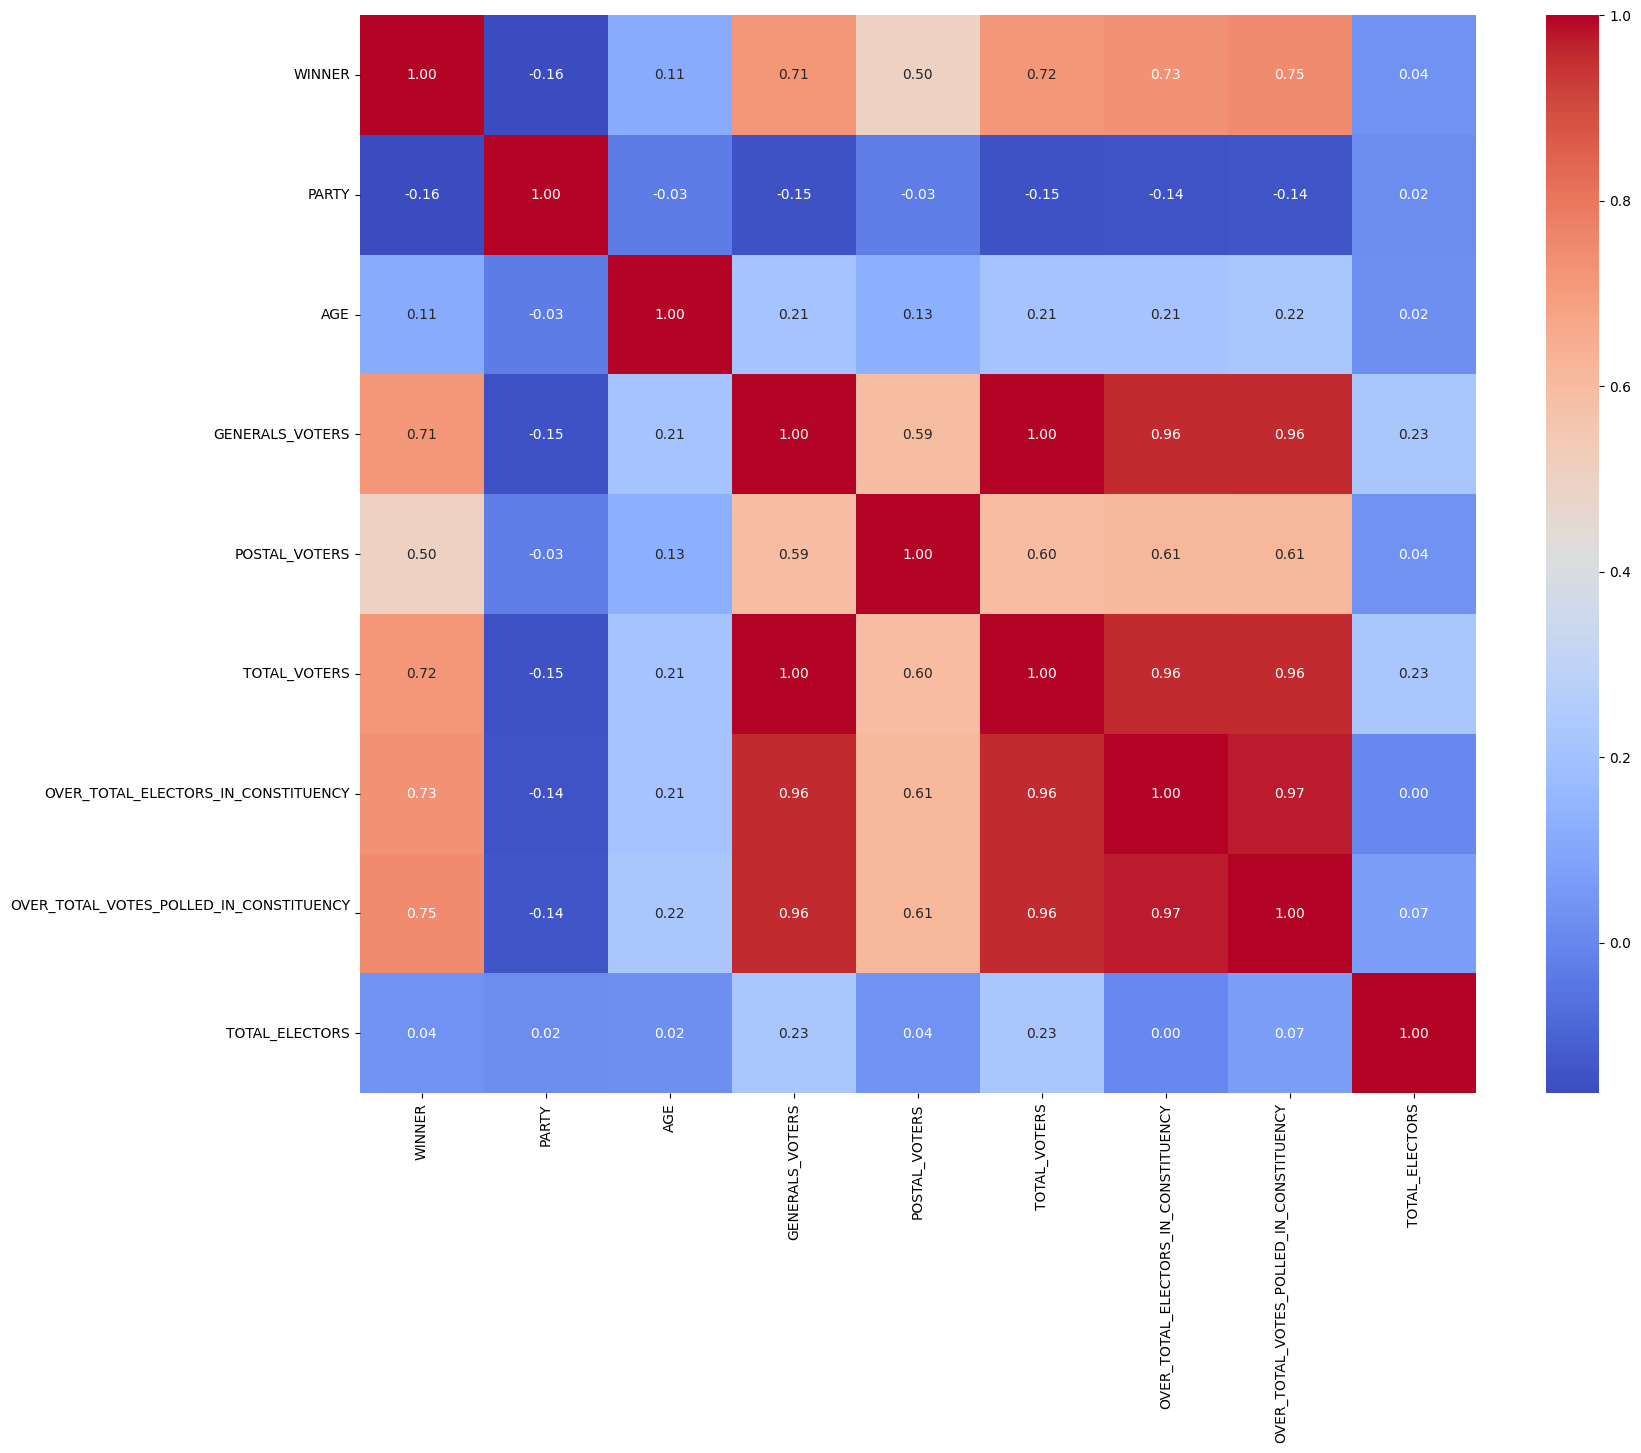

In [50]:
figsize=(18,14)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

"This code creates a heatmap to visualize the correlation matrix of the DataFrame (df). The figure size is set to 18x14 inches for a clear and detailed display. Each cell in the heatmap represents the correlation coefficient between pairs of variables in the DataFrame. Annotations with numerical values are added to provide precise correlation values. The color scale, ranging from cool to warm tones, aids in interpreting the strength and direction of correlations. This heatmap is a valuable tool for identifying patterns and relationships among different variables in the dataset, contributing to a comprehensive understanding of the interdependencies within the

**Basic Feature Engineering**

In [70]:
df['PARTY'].value_counts()

26    420
46    413
47    201
35    163
38    100
     ... 
68      1
67      1
52      1
17      1
85      1
Name: PARTY, Length: 132, dtype: int64

In [71]:
df['CATEGORY'].value_counts()

GENERAL    1392
SC          383
ST          243
Name: CATEGORY, dtype: int64

In [72]:
df['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Not Available             22
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [73]:
encoded_edu = []

# iterate through each row in the dataset
for row in df.itertuples():
    education = row.EDUCATION

    if education == "Illiterate":
        encoded_edu.append(0)
    elif education == "Literate":
        encoded_edu.append(1)
    elif education == "5th Pass":
        encoded_edu.append(2)
    elif education == "8th Pass":
        encoded_edu.append(3)
    elif education == "10th Pass":
        encoded_edu.append(4)
    elif education == "12th Pass":
        encoded_edu.append(7)
    elif education == "Graduate":
        encoded_edu.append(8)
    elif education == "Post Graduate":
        encoded_edu.append(9)
    elif education == "Graduate Professional":
        encoded_edu.append(10)
    elif education == "Doctorate":
        encoded_edu.append(11)
    else:
        encoded_edu.append(5)

df['EDUCATION'] = encoded_edu

**Creating New Feature Columns**

In [75]:
# Preparing feature values

cons_per_state = {}
voters_per_state = {}
party_winningSeats = {}
party_education = {}

party_totalCandidates_per_cons = {}
party_winningSeats_per_cons = {}
party_education_per_cons = {}
voters_per_cons = {}


# group by state
subset = df[['STATE', 'CONSTITUENCY', 'OVER_TOTAL_ELECTORS_IN_CONSTITUENCY']]
gk = subset.groupby('STATE')

# for each state
for name,group in gk:
    # total constituencies per state
    cons_per_state[name] = len(group)

    # total voters per state
    voters_per_state[name] = group['OVER_TOTAL_ELECTORS_IN_CONSTITUENCY'].sum()


# group by party
subset = df[['PARTY', 'CONSTITUENCY','EDUCATION', 'WINNER']]
gk = subset.groupby('PARTY')

# for each party
for name,group in gk:
    # winning seats by party
    party_winningSeats[name] = group[group['WINNER'] == 1.0].shape[0]


    # education qualification by party (sum of candidates)
    party_education[name] = group['EDUCATION'].sum()

    # group by constituency
    gk2 = group.groupby('CONSTITUENCY')

    # for each constituency
    for name2, group2 in gk2:
        key = str(name2) + '_' + str(name)

        # total candidates by party in constituency
        party_totalCandidates_per_cons[key] = len(group2)

        # party winning seats in the constituency
        party_winningSeats_per_cons[key] = group2[group2['WINNER'] == 1.0].shape[0]



        # education qualification by party in constituency (sum of candidates)
        party_education_per_cons[key] = group2['EDUCATION'].sum()


# Total voters per constituency
subset = df[['CONSTITUENCY', 'OVER_TOTAL_ELECTORS_IN_CONSTITUENCY']]
gk = subset.groupby('CONSTITUENCY')

# for each constituency
for name,group in gk:
    voters_per_cons[name] = len(group)
# Applying feature values

# new feature columns
total_cons_per_state = []
total_voters_per_state = []
total_voters_per_cons = []

winning_seats_by_party = []
criminal_by_party = []
education_by_party = []

total_candidates_by_party_per_cons = []
winning_seats_by_party_per_cons = []
criminal_by_party_per_cons = []
education_by_party_per_cons = []


# iterate through each row in the dataset
for row in df.itertuples():
    subkey = str(row.CONSTITUENCY) + '_' + str(row.PARTY)

    total_cons_per_state.append(cons_per_state.get(row.STATE))
    total_voters_per_state.append(voters_per_state.get(row.STATE))
    total_voters_per_cons.append(voters_per_cons.get(row.CONSTITUENCY))
    winning_seats_by_party.append(party_winningSeats.get(row.PARTY))
    education_by_party.append(party_education.get(row.PARTY))
    total_candidates_by_party_per_cons.append(party_totalCandidates_per_cons.get(subkey))
    winning_seats_by_party_per_cons.append(party_winningSeats_per_cons.get(subkey))
    education_by_party_per_cons.append(party_education_per_cons.get(subkey))


# append columns to dataset
df['total_cons_per_state'] = total_cons_per_state
df['total_voters_per_state'] = total_voters_per_state
df['total_voters_per_cons'] = total_voters_per_cons
df['winning_seats_by_party'] = winning_seats_by_party
df['education_by_party'] = education_by_party
df['total_candidates_by_party_per_cons'] = total_candidates_by_party_per_cons
df['winning_seats_by_party_per_cons'] = winning_seats_by_party_per_cons
df['education_by_party_per_cons'] = education_by_party_per_cons

***Feature selection***

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature matrix and target variable, replace them with your actual data
# Assuming you have already processed and cleaned your data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (assuming you have numerical features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomForestClassifier for feature selection
clf = RandomForestClassifier(random_state=42)
selector = SelectFromModel(clf)
selector.fit(X_train_scaled, y_train)

# Transform the data to include only selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train and evaluate a model with selected features
selected_model = RandomForestClassifier(random_state=42)
selected_model.fit(X_train_selected, y_train)
y_pred_selected = selected_model.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

print("Model with Selected Features:")
print(f"Accuracy: {accuracy_selected:.4f}")
print("Classification Report:\n", report_selected)


Model with Selected Features:
Accuracy: 0.9653
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         2
          23       1.00      1.00      1.00         2
          24       1.00      1.00      1.00         4
          26       1.00      1.00      1.00        90
          

**Model Building**

In [76]:
df.dropna(inplace=True)

In [77]:
def categorizing(dat):
    cat = dat.astype('category').cat.codes
    return cat

In [78]:
df['STATE'] = categorizing(df['STATE'])
df['CONSTITUENCY'] = categorizing(df['CONSTITUENCY'])
df['NAME'] = categorizing(df['NAME'])
df['PARTY'] = categorizing(df['PARTY'])
df['SYMBOL'] = categorizing(df['SYMBOL'])
df['GENDER'] = categorizing(df['GENDER'])
df['CATEGORY'] = categorizing(df['CATEGORY'])
df['EDUCATION'] = categorizing(df['EDUCATION'])
df['ASSETS'] = categorizing(df['ASSETS'])
df['LIABILITIES'] = categorizing(df['LIABILITIES'])

In [79]:
df.drop(['CRIMINAL'],axis=1,inplace=True)
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,AGE,CATEGORY,EDUCATION,...,OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n,TOTAL_ELECTORS,total_cons_per_state,total_voters_per_state,total_voters_per_cons,winning_seats_by_party,education_by_party,total_candidates_by_party_per_cons,winning_seats_by_party_per_cons,education_by_party_per_cons
0,31,0,1712,1,26,80,1,52.0,2,6,...,35.468248,1489790,74,1044.973998,3,300,3339,1,1,7
1,31,0,700,0,119,32,1,54.0,2,8,...,29.964370,1489790,74,1044.973998,3,9,147,1,0,9
2,31,0,1497,0,46,66,1,52.0,2,6,...,29.534285,1489790,74,1044.973998,3,52,3348,1,0,7
4,33,1,1788,1,26,80,1,58.0,1,10,...,56.464615,1937690,251,4589.936789,3,300,3339,1,1,11
5,33,1,1118,0,35,49,1,47.0,1,8,...,37.999125,1937690,251,4589.936789,3,11,1111,1,0,9


**Model Evaluation**

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_true and y_pred are your true labels and predicted labels, respectively

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)  # y_pred_prob is the predicted probability for positive class
print(f'ROC-AUC: {roc_auc:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000
Confusion Matrix:
[[442   0]
 [  0 164]]


In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Squared Error: 0.0000
R-squared: 1.0000
Mean Absolute Error: 0.0000


**LogisticRegression**

In [80]:
y = df['WINNER']
X = df.drop(['WINNER'],axis=1)

In [82]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['STATE'] = labelEncoder_X.fit_transform(df['STATE'])
df['CONSTITUENCY'] = labelEncoder_X.fit_transform(df['CONSTITUENCY'])
df['NAME'] = labelEncoder_X.fit_transform(df['NAME'])
df['PARTY'] = labelEncoder_X.fit_transform(df['PARTY'])
df['SYMBOL'] = labelEncoder_X.fit_transform(df['SYMBOL'])
df['GENDER'] = labelEncoder_X.fit_transform(df['GENDER'])
df['CATEGORY'] = labelEncoder_X.fit_transform(df['CATEGORY'])
df['EDUCATION'] = labelEncoder_X.fit_transform(df['EDUCATION'])
X=df.drop(['WINNER','ASSETS','LIABILITIES','GENERALS_VOTERS','POSTAL_VOTERS','AGE','OVER_TOTAL_ELECTORS_IN_CONSTITUENCY','OVER_TOTAL_VOTES_POLLED_IN_CONSTITUENCY\n'],axis=1)
y=df['WINNER']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score

In [83]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
[[442   0]
 [  0 164]]


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
logistic_regression = LogisticRegression(random_state=1)
logistic_regression.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [87]:
prediction=logistic_regression.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [88]:
acc1 = logistic_regression.score(x_test,y_test)
acc1

0.8366336633663366

**Random Forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier
Rforest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
Rforest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc__pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc__pred))
print(confusion_matrix(y_test,rfc__pred))

0.7392739273927392
[[443  12]
 [146   5]]


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1452, 18) (162, 18) (404, 18) (1452,) (162,) (404,)


Text(0.5, 1.0, 'Random Forest Classifier scores for different K values')

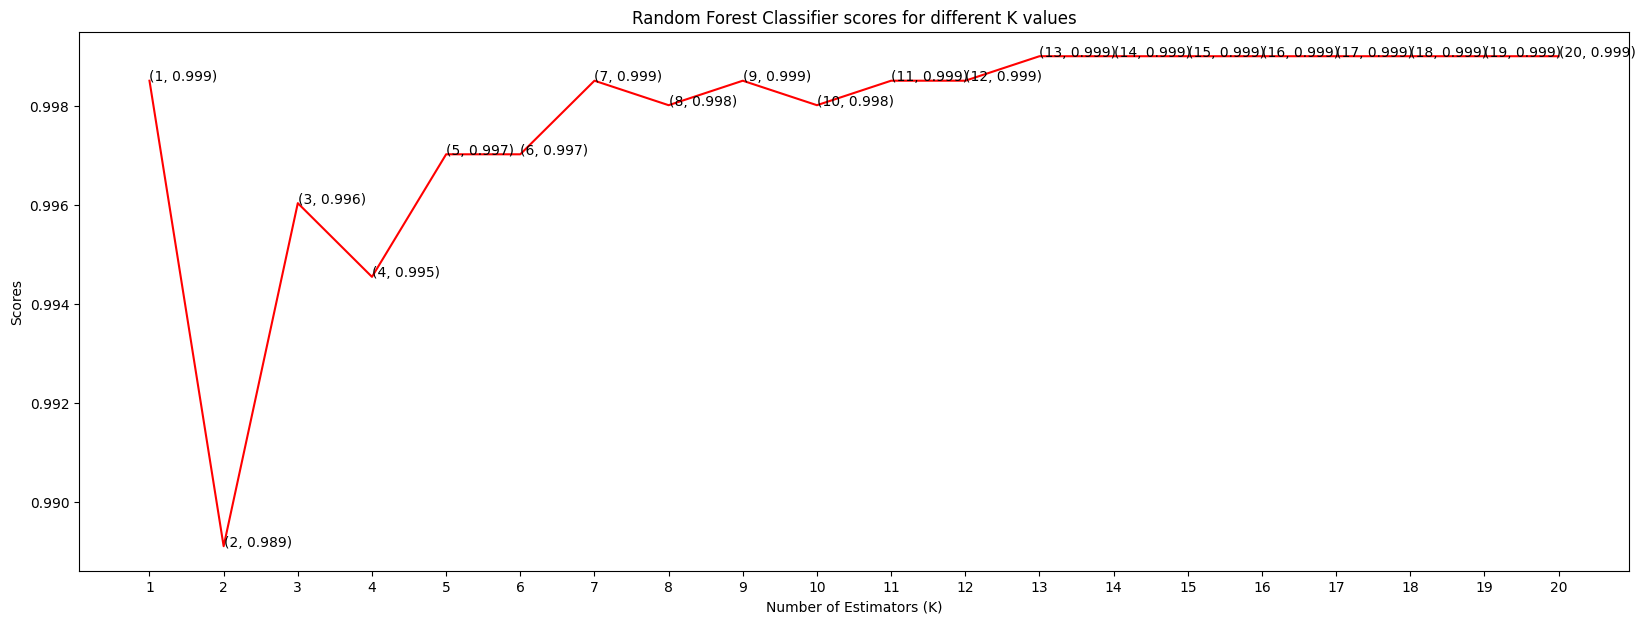

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc_scores = []
for k in range(1,21):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rfc_scores.append(score.mean())
plt.figure(figsize =(20,7))
plt.plot([k for k in range(1, 21)], rfc_scores, color = 'red')
for i in range(1,21):
    plt.text(i, rfc_scores[i-1], (i, round(rfc_scores[i-1],3)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Estimators (K)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different K values')

**Conclusion**

In [99]:
X = df.drop('TOTAL_VOTERS', axis=1)
y = df['PARTY']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature selection using RFE
rfe = RFE(classifier, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model with selected features
classifier.fit(X_train_rfe, y_train)

# Transform the test set with selected features
X_test_rfe = rfe.transform(X_test)

# Make predictions on the test set
y_pred = classifier.predict(X_test_rfe)

# Evaluate the model
accuracy_rfe = accuracy_score(y_test, y_pred)
report_rfe = classification_report(y_test, y_pred)

# Print the results
print("Conclusion:")
print("1. Feature Selection using Recursive Feature Elimination (RFE) with RandomForestClassifier was applied.")
print("2. Selected Features:", list(X.columns[rfe.support_]))
print(f"3. Model Accuracy with Selected Features: {accuracy_rfe:.4f}")
print("4. Classification Report:\n", report_rfe)

Conclusion:
1. Feature Selection using Recursive Feature Elimination (RFE) with RandomForestClassifier was applied.
2. Selected Features: ['STATE', 'PARTY', 'SYMBOL', 'winning_seats_by_party', 'education_by_party']
3. Model Accuracy with Selected Features: 0.9629
4. Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      1.00      0.91         5
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         2
      